In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 90)

df = pd.read_csv("C:/Users/marcio/Documents/fish_analyzer_final.csv", index_col=0)
import ast
df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)
df['center_of_mass'] = df['center_of_mass'].apply(ast.literal_eval)

#df['head'] = df['head'].apply(ast.literal_eval)



In [2]:
df["len_of_line"] = df["tail_coords"].apply(lambda x: x[-1][0] - x[0][0]) 

In [3]:
df.loc[df["quadrant"] == 2]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line
frame_number,,,,,,,,,,,,
1607,13.601471,"(652, 165)","(676, 185)","(641, 157)",2,288.5,2,"(440, 0, 408, 403)",36254,"((1.0, 0.9952875495966528), (1.214765850730197...",103,0.826441
1608,13.038405,"(653, 165)","(676, 185)","(642, 158)",2,286.5,2,"(440, 0, 408, 403)",36254,"((1.0, 1.000075869113683), (1.205032409224397,...",103,0.828442
1609,13.038405,"(653, 165)","(676, 185)","(642, 158)",2,286.5,2,"(440, 0, 408, 403)",36254,"((1.0, 1.000075869113683), (1.205032409224397,...",103,0.828442
1610,12.806248,"(652, 166)","(676, 185)","(642, 158)",2,290.0,2,"(440, 0, 408, 403)",36254,"((1.0, 1.0211714476089688), (1.184400879475084...",103,0.826830
1611,12.806248,"(652, 166)","(676, 185)","(642, 158)",2,290.5,2,"(440, 0, 408, 403)",36254,"((1.0, 0.999820640929553), (1.2053496015925598...",103,0.829723
...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36181,"((1.0, 0.997557372231594), (1.2966424643241747...",103,1.172347
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9959407016995924), (1.365455546974131...",103,1.176954
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9998938656633769), (1.294553914570478...",103,1.176184


In [4]:
df["tail_uniformity"] = np.NaN

def vari(the_tuple):
    if isinstance(the_tuple, tuple):
        y_tuple = tuple(zip(*the_tuple))[1]
        cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100        
        result = cv(y_tuple)
        if result is not None:      
            return result
        else:
            return np.NaN
    else:
        np.NaN

df["tail_uniformity"] = df.tail_coords.apply(vari)

<AxesSubplot:>

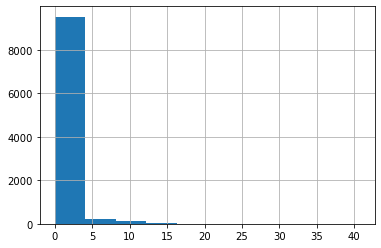

In [5]:
df.tail_uniformity.hist()

In [6]:
#df = df[(df["quadrant"] == 1) & (df["fish_id"] == 1)]

In [7]:
df["ant"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-3])
df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
df["ult"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-1])


df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()

for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    print(the_idxs)    
    cycle_number = 1
    count=0  
    for i in the_idxs:       
        #df.loc[i, "cycle"] = cycle_number
        df.loc[(df.index == i) & (df["sequence"] == n), "cycle"] = cycle_number

        count=count+1        
        if count == 6:
            cycle_number=cycle_number+1
            count = 0 
                
        
            
    
    
    
    

In [8]:
df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()

for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    cycle_number = 1
    for real_index, nominal_index in enumerate(the_idxs):       
        current_position = df.loc[(df.index == nominal_index) & (df["sequence"] == n), "ult"].iloc[0]
        print(current_position)
        print(real_index)       
        if real_index == 0:
            last_position = current_position
                    
        elif real_index == 1:           
            if current_position > last_position:                
                trend = "up"
                
            elif current_position < last_position:
                trend = "down"
                
            else:
                trend = "undefined"
                #  Keep the same last_tail_direction                
                              
        else:
            if (current_position > last_position) & (trend=="undefined"):
                trend = "up"
                print("first")
            elif (current_position < last_position) & (trend=="undefined"):
                trend = "down"
                print("second")
            elif (current_position > last_position) & (trend=="dow"):
                cycle_number=cycle_number+1
            
            elif (current_position < last_position) & (trend=="up"):
                cycle_number=cycle_number+1    
                print("third")           

            elif (current_position == last_position):
                pass
            
           
  
        last_position = current_position
        
        df.loc[(df.index == nominal_index) & (df["sequence"] == n), "cycle"] = cycle_number    
    

21322
1.003994041885862
0
1.0017819945667412
1
1.0078374744480776
2
1.0060987502853305
3
0.9979573360889491
4
1.0020054107236707
5
21325
1.0000763858374064
0
0.9964791220780835
1
0.9873999895017214
2
0.9912584787450669
3
1.0000655872093098
4
1.0043563111904774
5
0.9850006870146828
6
5
1.0195141452874346
0
1.0195141452874346
1
1.0235336050330601
2
first
1.0029234217973926
3
third
0.9984198054269178
4
third
0.9984198054269178
5
0.9828174528286041
6
third
6
1.0029190190537212
0
0.9999595889316493
1
0.9999595889316493
2
1.002938848165759
3
1.002938848165759
4
1.0043506665718658
5
8
1.0028790298413508
0
1.0029432808175922
1
1.0029234217973926
2
third
1.0029234217973926
3
1.0029158472509587
4
third
1.0029158472509587
5
1.0014122927318172
6
third
0.9998698238176561
7
third
0.9998698238176561
8
0.9998698238176561
9
0.9998698238176561
10
14628
0.9987684502069234
0
0.9979307605705898
1
0.9991591987337998
2
0.9975444225676604
3
0.9998923416435692
4
1.0020261897408416
5
0.9999150447750482
6
1.0010

In [9]:
df['diffs'] = df.groupby(["sequence", "cycle"])['ult'].diff()
df['speed_frame']=df['diffs'].apply(lambda x: abs(x))


In [10]:
df.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69,0.128043,0.174481,1.000333,1.001754,1.003994,1.0,NaN,NaN
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69,0.127380,0.146332,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9998988815681926), (1.030986970014337...",69,0.127047,0.351359,0.999408,1.000377,1.007837,1.0,0.006055,0.006055
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9980453015716151), (1.032105088161948...",69,0.128420,0.304076,1.000358,1.001782,1.006099,1.0,-0.001739,0.001739
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69,0.128822,0.101164,0.999485,0.998389,0.997957,1.0,-0.008141,0.008141
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0020090685512972), (1.031075590734383...",69,0.128041,0.104689,1.000308,1.001751,1.002005,1.0,0.004048,0.004048
1288,17.492856,"(710, 490)","(677, 471)","(725, 499)",1,354.5,2,"(440, 426, 408, 444)",21325,"((1.0, 1.0018316730915195), (1.030893514592229...",69,0.127852,0.091183,1.000424,1.001470,1.000076,1.0,NaN,NaN
1289,18.867962,"(712, 491)","(677, 471)","(728, 501)",1,361.5,2,"(440, 426, 408, 444)",21325,"((1.0, 1.0016460227135484), (1.031603718849273...",69,0.127772,0.193937,0.999553,0.998584,0.996479,1.0,-0.003597,0.003597
1290,15.811388,"(718, 495)","(685, 477)","(731, 504)",1,355.5,2,"(440, 426, 408, 444)",21325,"((1.0, 1.0016239073821396), (1.033759154880561...",69,0.126380,0.576782,1.000266,0.996614,0.987400,1.0,-0.009079,0.009079


In [11]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,,
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",14631,"((1.0, 1.0029504689751452), (1.027871425912429...",51,0.106608,0.143487,0.999535,1.000329,1.002175,2.0,0.0,0.0
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,"((1.0, 1.0028328483253042), (4.557768431808241...",1,13.927567,0.152971,0.999246,0.999030,0.999870,3.0,NaN,NaN
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",43581,"((1.0, 1.0451416043269928), (4.227165832513203...",119,13.062338,4.210441,0.994098,0.980920,0.929752,1.0,NaN,NaN


In [12]:
#df["velocity"] = np.NaN

temp = df.groupby(["sequence", "cycle"])["speed_frame"].apply(lambda grp: grp.mean())
temp = temp.reset_index()

#df["velocity"] = temp["cycle"]


In [13]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,,
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",14631,"((1.0, 1.0029504689751452), (1.027871425912429...",51,0.106608,0.143487,0.999535,1.000329,1.002175,2.0,0.0,0.0
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,"((1.0, 1.0028328483253042), (4.557768431808241...",1,13.927567,0.152971,0.999246,0.999030,0.999870,3.0,NaN,NaN
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",43581,"((1.0, 1.0451416043269928), (4.227165832513203...",119,13.062338,4.210441,0.994098,0.980920,0.929752,1.0,NaN,NaN


In [14]:
temp.head(10)

,sequence,cycle,speed_frame
0,5,1.0,0.002010
1,5,2.0,NaN
2,5,3.0,0.000000
3,5,4.0,NaN
4,6,1.0,0.001470
5,8,1.0,0.000064
6,8,2.0,NaN
7,8,3.0,0.001033
8,8,4.0,0.001615
9,8,5.0,0.001922


In [15]:
df = df.reset_index()
temp = temp.rename(columns={"speed_frame":"speed_cycle"})
        
df = df.merge(temp, on=["sequence", "cycle"]) #.set_axis(df.index)
df.head(5)

,frame_number,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,...,take,len_of_line,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
0,1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,...,69,0.128043,0.174481,1.000333,1.001754,1.003994,1.0,NaN,NaN,0.004439
1,1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,...,69,0.127380,0.146332,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212,0.004439
2,1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,...,69,0.127047,0.351359,0.999408,1.000377,1.007837,1.0,0.006055,0.006055,0.004439
3,1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,...,69,0.128420,0.304076,1.000358,1.001782,1.006099,1.0,-0.001739,0.001739,0.004439
4,1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,...,69,0.128822,0.101164,0.999485,0.998389,0.997957,1.0,-0.008141,0.008141,0.004439


In [16]:

df = df.set_index('frame_number')


In [17]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
frame_number,,,,,,,,,,,,,,,,,,,,
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,"((1.0, 1.0028328483253042), (4.557768431808241...",1,13.927567,0.152971,0.999246,0.999030,0.999870,3.0,NaN,NaN,0.002542
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",14631,"((1.0, 1.0029504689751452), (1.027871425912429...",51,0.106608,0.143487,0.999535,1.000329,1.002175,2.0,0.0,0.0,0.001567
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",43581,"((1.0, 1.0451416043269928), (4.227165832513203...",119,13.062338,4.210441,0.994098,0.980920,0.929752,1.0,NaN,NaN,0.046858


In [18]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
frame_number,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69,0.128043,0.174481,1.000333,1.001754,1.003994,1.0,NaN,NaN,0.004439
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69,0.127380,0.146332,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212,0.004439
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9998988815681926), (1.030986970014337...",69,0.127047,0.351359,0.999408,1.000377,1.007837,1.0,0.006055,0.006055,0.004439
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9980453015716151), (1.032105088161948...",69,0.128420,0.304076,1.000358,1.001782,1.006099,1.0,-0.001739,0.001739,0.004439
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69,0.128822,0.101164,0.999485,0.998389,0.997957,1.0,-0.008141,0.008141,0.004439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36181,"((1.0, 0.997557372231594), (1.2966424643241747...",103,1.172347,0.408253,1.000223,0.997370,0.990122,1.0,0.000177,0.000177,0.006159
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9959407016995924), (1.365455546974131...",103,1.176954,0.246324,1.000709,0.999499,0.995172,1.0,0.005050,0.005050,0.006159
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9998938656633769), (1.294553914570478...",103,1.176184,0.128354,0.999359,0.997949,0.997415,1.0,0.002242,0.002242,0.006159


In [19]:
df.columns

Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'len_of_line', 'tail_uniformity', 'ant', 'pen',
       'ult', 'cycle', 'diffs', 'speed_frame', 'speed_cycle'],
      dtype='object')

In [20]:
#df["distance_cycle"] = np.NaN
import math
temp = df.groupby(["sequence", "cycle"])
#temp = temp.reset_index()
the_firsts = temp.head(1)
the_lasts = temp.tail(1)
the_firsts["distance_cycle"] = np.NaN


for i in range(0, len(the_firsts)):
    #the_idxs = df.loc[df["sequence"] == i].index
    first_com = the_firsts.iloc[i, 1]
    last_com = the_lasts.iloc[i, 1]

    the_firsts.iloc[i, 20] = math.hypot((first_com[0] - last_com[0]), (first_com[1] - last_com[1]))

print(the_firsts)    
temp = the_firsts[["sequence", "cycle", "distance_cycle"]]
#temp = temp.rename(columns={"distance":"distance_g"})
df = df.reset_index()

df = df.merge(temp, on=["sequence", "cycle"])

    
df = df.set_index('frame_number')        
    
    



<ipython-input-20-3d0345bfaf8a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_firsts["distance_cycle"] = np.NaN
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


              length_of_fish center_of_mass   fish_tail   fish_head  quadrant  \
frame_number                                                                    
1276               17.720045     (680, 478)  (646, 463)  (697, 483)         1   
1288               17.492856     (710, 490)  (677, 471)  (725, 499)         1   
1292               21.840330     (137, 664)  (183, 653)  (116, 670)         0   
1295               22.135944     (138, 664)  (184, 654)  (117, 671)         0   
1296               20.880613     (137, 665)  (183, 654)  (117, 671)         0   
...                      ...            ...         ...         ...       ...   
18951              13.341664     (658, 400)  (628, 400)  (671, 403)         2   
18957              14.142136     (685, 401)  (654, 399)  (699, 403)         2   
18965              12.806248     (453, 295)  (476, 314)  (443, 287)         2   
18978              13.892444     (812, 793)  (783, 786)  (824, 800)         1   
18978              16.124515

In [21]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,len_of_line,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle
frame_number,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",...,0.128043,0.174481,1.000333,1.001754,1.003994,1.0,NaN,NaN,0.004439,11.401754
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",...,0.127380,0.146332,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212,0.004439,11.401754
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9998988815681926), (1.030986970014337...",...,0.127047,0.351359,0.999408,1.000377,1.007837,1.0,0.006055,0.006055,0.004439,11.401754
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9980453015716151), (1.032105088161948...",...,0.128420,0.304076,1.000358,1.001782,1.006099,1.0,-0.001739,0.001739,0.004439,11.401754
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",...,0.128822,0.101164,0.999485,0.998389,0.997957,1.0,-0.008141,0.008141,0.004439,11.401754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36181,"((1.0, 0.997557372231594), (1.2966424643241747...",...,1.172347,0.408253,1.000223,0.997370,0.990122,1.0,0.000177,0.000177,0.006159,47.010637
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9959407016995924), (1.365455546974131...",...,1.176954,0.246324,1.000709,0.999499,0.995172,1.0,0.005050,0.005050,0.006159,47.010637
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9998938656633769), (1.294553914570478...",...,1.176184,0.128354,0.999359,0.997949,0.997415,1.0,0.002242,0.002242,0.006159,47.010637


In [22]:
    
df.columns

Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'len_of_line', 'tail_uniformity', 'ant', 'pen',
       'ult', 'cycle', 'diffs', 'speed_frame', 'speed_cycle',
       'distance_cycle'],
      dtype='object')

In [23]:
df["tail_diff"]

KeyError: 'tail_diff'

<AxesSubplot:>

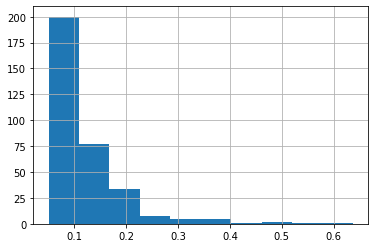

In [ ]:

temp = df.loc[df["tail_diff"] > 0.05]
temp["tail_diff"].hist()

In [ ]:
df["tail_diff"] = df["pen"] - df["ult"]


temp_max = df.groupby(["sequence", "cycle"])["tail_diff"].max()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"tail_diff":"tail_diff_max"})
df = df.reset_index()
df = df.merge(temp_max, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')   

temp_min = df.groupby(["sequence", "cycle"])["tail_diff"].min()
temp_min = temp_min.reset_index()
temp_min = temp_min.rename(columns={"tail_diff":"tail_diff_min"})
df = df.reset_index()
df = df.merge(temp_min, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')
df["tail_diff_min"] = df["tail_diff_min"].apply(lambda x: abs(x))


In [ ]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min
frame_number,,,,,,,,,,,,,,,,,,,,,
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,"((1.0, 1.0028328483253042), (4.557768431808241...",...,0.999030,0.999870,3.0,NaN,NaN,0.002542,1.000000,0.000840,0.002345,0.000840
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",14631,"((1.0, 1.0029504689751452), (1.027871425912429...",...,1.000329,1.002175,2.0,0.0,0.0,0.001567,4.472136,0.001846,0.005789,0.001846
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",43581,"((1.0, 1.0451416043269928), (4.227165832513203...",...,0.980920,0.929752,1.0,NaN,NaN,0.046858,2.236068,0.051168,0.051168,0.022109


In [ ]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min
frame_number,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",...,1.001754,1.003994,1.0,NaN,NaN,0.004439,11.401754,0.002240,0.007461,0.000254
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",...,0.998708,1.001782,1.0,-0.002212,0.002212,0.004439,11.401754,0.003074,0.007461,0.000254
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9998988815681926), (1.030986970014337...",...,1.000377,1.007837,1.0,0.006055,0.006055,0.004439,11.401754,0.007461,0.007461,0.000254
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9980453015716151), (1.032105088161948...",...,1.001782,1.006099,1.0,-0.001739,0.001739,0.004439,11.401754,0.004317,0.007461,0.000254
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",...,0.998389,0.997957,1.0,-0.008141,0.008141,0.004439,11.401754,0.000431,0.007461,0.000254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36181,"((1.0, 0.997557372231594), (1.2966424643241747...",...,0.997370,0.990122,1.0,0.000177,0.000177,0.006159,47.010637,0.007248,0.012565,0.000535
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9959407016995924), (1.365455546974131...",...,0.999499,0.995172,1.0,0.005050,0.005050,0.006159,47.010637,0.004327,0.012565,0.000535
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9998938656633769), (1.294553914570478...",...,0.997949,0.997415,1.0,0.002242,0.002242,0.006159,47.010637,0.000535,0.012565,0.000535


In [ ]:
#/df["length_of_fish"]

#df.loc[df["amplitude_cycle"] < 0.3]

#df["amplitude_cycle"] = df["amplitude_cycle"]/df["length_of_fish"]



In [ ]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min
frame_number,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",...,1.001754,1.003994,1.0,NaN,NaN,0.004439,11.401754,0.002240,0.007461,0.000254
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",...,0.998708,1.001782,1.0,-0.002212,0.002212,0.004439,11.401754,0.003074,0.007461,0.000254
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9998988815681926), (1.030986970014337...",...,1.000377,1.007837,1.0,0.006055,0.006055,0.004439,11.401754,0.007461,0.007461,0.000254
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9980453015716151), (1.032105088161948...",...,1.001782,1.006099,1.0,-0.001739,0.001739,0.004439,11.401754,0.004317,0.007461,0.000254
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",...,0.998389,0.997957,1.0,-0.008141,0.008141,0.004439,11.401754,0.000431,0.007461,0.000254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36181,"((1.0, 0.997557372231594), (1.2966424643241747...",...,0.997370,0.990122,1.0,0.000177,0.000177,0.006159,47.010637,0.007248,0.012565,0.000535
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9959407016995924), (1.365455546974131...",...,0.999499,0.995172,1.0,0.005050,0.005050,0.006159,47.010637,0.004327,0.012565,0.000535
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9998938656633769), (1.294553914570478...",...,0.997949,0.997415,1.0,0.002242,0.002242,0.006159,47.010637,0.000535,0.012565,0.000535


In [ ]:
temp_max = df.groupby(["sequence", "cycle"])["length_of_fish"].mean()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"length_of_fish":"group_length_of_fish"})
df = df.reset_index()
df = df.merge(temp_max, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')   


In [ ]:
df["amplitude_cycle"] = (df["tail_diff_max"] + df["tail_diff_min"]) #/df["group_length_of_fish"]


In [ ]:
#df=df.loc[df["speed_cycle"] < 110]
#df=df.loc[df["distance_cycle"] < 38]
#df=df.loc[df["amplitude_cycle"] < 160]

In [ ]:
df["freq"] = df["speed_cycle"]/(df["amplitude_cycle"]*2)


#df=df.loc[(df["freq"] < 0.24 )]



df["wave_length"] = df["speed_cycle"]/df["freq"]

In [ ]:
df["freq*ampli"] = df["amplitude_cycle"]*df["freq"]

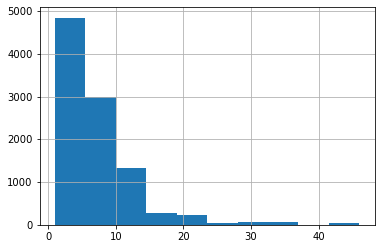

In [ ]:
temp = df.groupby(["sequence", "cycle"])["pen"].count()
temp = temp.reset_index()
temp = temp.rename(columns={"pen":"c_counts"})
df = df.reset_index()
df = df.merge(temp, on=["sequence", "cycle"])
df = df.set_index('frame_number')        


df["c_counts"].hist(bins=10)

df = df.loc[df["c_counts"] > 5]

In [ ]:
temp = df.groupby(["sequence", "cycle"])["tail_uniformity"].max()
temp = temp.reset_index()
#temp = temp.rename(columns={"pen":"c_counts"})
df = df.reset_index()
df = df.merge(temp, on=["sequence", "cycle"])
df = df.set_index('frame_number') 
df = df.rename(columns={"tail_uniformity_y":"tail_uniformity"})
df = df.drop('tail_uniformity_x', axis=1)

       

In [ ]:
pd.set_option('display.max_columns', None)
df[df["c_counts"] > 10].head(15)


,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,group_length_of_fish,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,tail_uniformity
frame_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1334,21.189620,"(138, 664)","(184, 654)","(118, 671)",0,612.5,1,"(0, 430, 414, 440)",10,"((1.0, 1.0000408973795956), (4.502801264947372...",1,13.879024,1.000251,1.001280,1.002943,1.0,0.000993,0.000993,0.005871,1.414214,0.001663,0.015419,0.000521,21.857196,0.000729,4.025108,0.001459,0.002936,14,1.386538
1335,22.135944,"(138, 664)","(185, 654)","(117, 671)",0,630.5,1,"(0, 430, 414, 440)",10,"((1.0, 1.001471423626071), (4.548695696262108,...",1,13.866200,1.000134,1.001359,1.002923,1.0,NaN,NaN,0.005871,1.414214,0.001564,0.015419,0.000521,21.857196,0.000729,4.025108,0.001459,0.002936,14,1.386538
1336,22.135944,"(138, 664)","(185, 654)","(117, 671)",0,625.5,1,"(0, 430, 414, 440)",10,"((1.0, 1.001450154861121), (4.58418265322473, ...",1,13.938488,0.999999,1.001451,1.004351,1.0,NaN,NaN,0.005871,1.414214,0.002900,0.015419,0.000521,21.857196,0.000729,4.025108,0.001459,0.002936,14,1.386538
1337,22.135944,"(138, 664)","(185, 654)","(117, 671)",0,620.5,1,"(0, 430, 414, 440)",10,"((1.0, 1.001450154861121), (4.58418265322473, ...",1,13.938488,0.999999,1.001451,1.004351,1.0,0.000000,0.000000,0.005871,1.414214,0.002900,0.015419,0.000521,21.857196,0.000729,4.025108,0.001459,0.002936,14,1.386538
1338,21.840330,"(138, 665)","(184, 655)","(117, 671)",0,617.0,1,"(0, 430, 414, 440)",10,"((1.0, 0.9999567935785314), (4.502801264947372...",1,13.879024,0.999738,1.000178,1.002850,1.0,-0.004993,0.004993,0.005871,1.414214,0.002672,0.015419,0.000521,21.857196,0.000729,4.025108,0.001459,0.002936,14,1.386538
1339,21.840330,"(138, 665)","(184, 655)","(117, 671)",0,606.5,1,"(0, 430, 414, 440)",10,"((1.0, 0.9999567935785314), (4.502801264947372...",1,13.879024,0.999738,1.000178,1.002850,1.0,-0.003653,0.003653,0.005871,1.414214,0.002672,0.015419,0.000521,21.857196,0.000729,4.025108,0.001459,0.002936,14,1.386538
1340,21.840330,"(138, 665)","(183, 655)","(117, 671)",0,601.5,1,"(0, 430, 414, 440)",10,"((1.0, 1.0014692076266345), (4.562152806918726...",1,13.918782,1.000134,1.001357,1.002919,1.0,0.006165,0.006165,0.005871,1.414214,0.001562,0.015419,0.000521,21.857196,0.000729,4.025108,0.001459,0.002936,14,1.386538
1341,21.840330,"(138, 665)","(184, 654)","(117, 671)",0,606.0,1,"(0, 430, 414, 440)",10,"((1.0, 1.0042876835917087), (4.606637362926149...",1,13.971506,0.999130,0.999111,0.999849,1.0,-0.001238,0.001238,0.005871,1.414214,0.000738,0.015419,0.000521,21.857196,0.000729,4.025108,0.001459,0.002936,14,1.386538
1342,21.840330,"(138, 665)","(184, 654)","(117, 671)",0,612.0,1,"(0, 430, 414, 440)",10,"((1.0, 1.0013867617022922), (4.576601912966246...",1,13.975241,0.999617,1.000261,1.002828,1.0,0.002979,0.002979,0.005871,1.414214,0.002567,0.015419,0.000521,21.857196,0.000729,4.025108,0.001459,0.002936,14,1.386538


<AxesSubplot:>

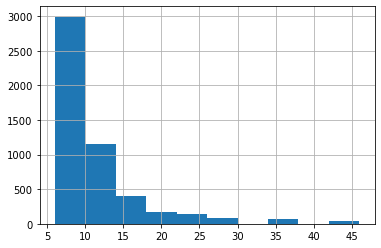

In [ ]:
df["c_counts"].hist(bins=10)


In [ ]:
df["fish_speed"] = df["distance_cycle"]/df["c_counts"]


In [ ]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,group_length_of_fish,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,tail_uniformity,fish_speed
frame_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69,0.128043,1.000333,1.001754,1.003994,1.0,NaN,NaN,0.004439,11.401754,0.002240,0.007461,0.000254,17.822616,0.000433,5.127781,0.000866,0.002220,6,0.351359,1.900292
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69,0.127380,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212,0.004439,11.401754,0.003074,0.007461,0.000254,17.822616,0.000433,5.127781,0.000866,0.002220,6,0.351359,1.900292
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9998988815681926), (1.030986970014337...",69,0.127047,0.999408,1.000377,1.007837,1.0,0.006055,0.006055,0.004439,11.401754,0.007461,0.007461,0.000254,17.822616,0.000433,5.127781,0.000866,0.002220,6,0.351359,1.900292
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9980453015716151), (1.032105088161948...",69,0.128420,1.000358,1.001782,1.006099,1.0,-0.001739,0.001739,0.004439,11.401754,0.004317,0.007461,0.000254,17.822616,0.000433,5.127781,0.000866,0.002220,6,0.351359,1.900292
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69,0.128822,0.999485,0.998389,0.997957,1.0,-0.008141,0.008141,0.004439,11.401754,0.000431,0.007461,0.000254,17.822616,0.000433,5.127781,0.000866,0.002220,6,0.351359,1.900292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36181,"((1.0, 0.997557372231594), (1.2966424643241747...",103,1.172347,1.000223,0.997370,0.990122,1.0,0.000177,0.000177,0.006159,47.010637,0.007248,0.012565,0.000535,15.957506,0.000821,3.751246,0.001642,0.003079,11,0.790233,4.273694
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9959407016995924), (1.365455546974131...",103,1.176954,1.000709,0.999499,0.995172,1.0,0.005050,0.005050,0.006159,47.010637,0.004327,0.012565,0.000535,15.957506,0.000821,3.751246,0.001642,0.003079,11,0.790233,4.273694
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9998938656633769), (1.294553914570478...",103,1.176184,0.999359,0.997949,0.997415,1.0,0.002242,0.002242,0.006159,47.010637,0.000535,0.012565,0.000535,15.957506,0.000821,3.751246,0.001642,0.003079,11,0.790233,4.273694


In [ ]:
df["fish_uid"] = df.apply(lambda x: str(x.quadrant) + str(x.fish_id), axis = 1 )

In [ ]:
df["amp_veloc_esp"] = df["amplitude_cycle"]/df["fish_speed"]
df["freq_veloc_esp"] = df["freq"]/df["fish_speed"]

In [ ]:
graphs = df.groupby(["sequence", "cycle"])
to_graphs = graphs.tail(1)
len(to_graphs)

584

In [ ]:
to_graphs = to_graphs.loc[to_graphs["tail_uniformity"] < 1]

#to_graphs = to_graphs.loc[to_graphs["fish_speed"] > 0.5]

In [ ]:
only1 = to_graphs.loc[(to_graphs["quadrant"] == 1) & (to_graphs["fish_id"] == 1)]
#only1

In [ ]:
only1

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,group_length_of_fish,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,tail_uniformity,fish_speed,fish_uid,amp_veloc_esp,freq_veloc_esp
frame_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1319,15.556349,"(706, 726)","(684, 699)","(717, 737)",1,329.0,1,"(440, 426, 408, 444)",14628,"((1.0, 1.000877986328825), (1.0258521356005723...",51,0.107594,0.999822,1.000121,1.001009,1.0,0.000000,0.000000,0.000000,15.231546,0.000887,0.001813,3.921852e-04,15.084751,0.000146,0.000000,NaN,0.000000,8,0.214274,1.903943,11,0.000077,0.000000
1359,15.033296,"(740, 760)","(707, 761)","(755, 761)",1,324.0,1,"(440, 426, 408, 444)",14636,"((1.0, 1.00248163418512), (1.0266504431513395,...",51,0.107409,0.999208,0.997917,0.995945,1.0,-0.010678,0.010678,0.006155,9.219544,0.001972,0.005625,1.223414e-03,15.152370,0.000452,6.808735,0.000904,0.003077,7,0.426856,1.317078,11,0.000343,5.169577
1367,16.124515,"(750, 762)","(716, 757)","(766, 764)",1,338.5,1,"(440, 426, 408, 444)",14638,"((1.0, 1.000037542431886), (1.0266556899106785...",51,0.107060,1.000223,1.001159,1.002651,1.0,0.001288,0.001288,0.002630,6.082763,0.001492,0.002854,1.110223e-16,15.386963,0.000186,7.089844,0.000371,0.001315,6,0.232749,1.013794,11,0.000183,6.993379
1382,15.000000,"(771, 765)","(739, 764)","(786, 765)",1,323.5,1,"(440, 426, 408, 444)",14639,"((1.0, 1.0025022634006167), (1.026563562593960...",51,0.107596,0.999438,0.999075,0.998608,1.0,-0.001448,0.001448,0.002659,17.117243,0.000467,0.004862,9.391481e-05,15.373812,0.000322,4.124637,0.000645,0.001330,14,0.258504,1.222660,11,0.000264,3.373494
1391,15.297059,"(788, 764)","(756, 769)","(803, 761)",1,329.0,1,"(440, 426, 408, 444)",14640,"((1.0, 1.0025630066205284), (1.027045377057197...",51,0.106606,0.999783,1.000145,0.999964,1.0,-0.001878,0.001878,0.003165,13.038405,0.000181,0.004983,9.132387e-05,14.966426,0.000339,4.666706,0.000678,0.001582,8,0.276887,1.629801,11,0.000208,2.863360
1577,13.038405,"(711, 471)","(741, 468)","(698, 472)",1,303.0,1,"(440, 426, 408, 444)",14782,"((1.0, 1.0019714892326324), (1.026658459680085...",51,0.106634,0.999090,0.996360,0.991356,1.0,-0.012800,0.012800,0.005443,15.811388,0.005005,0.005800,7.667505e-04,13.222769,0.000497,5.479732,0.000993,0.002721,10,0.420756,1.581139,11,0.000314,3.465687
1759,15.000000,"(621, 815)","(588, 815)","(636, 815)",1,322.5,1,"(440, 426, 408, 444)",14895,"((1.0, 0.9987419275634153), (1.026646955783069...",51,0.106588,0.999779,1.000149,1.003624,1.0,NaN,NaN,0.000901,29.427878,0.003475,0.006541,0.000000e+00,14.875000,0.000440,1.024099,0.000879,0.000450,8,0.284294,3.678485,11,0.000120,0.278402
2201,14.560220,"(754, 757)","(723, 766)","(768, 753)",1,325.5,1,"(440, 426, 408, 444)",15144,"((1.0, 1.0000354268588332), (1.026440521718330...",51,0.106779,1.000211,0.999862,0.997442,1.0,-0.002461,0.002461,0.003136,74.672619,0.002420,0.005046,0.000000e+00,15.041158,0.000335,4.673013,0.000671,0.001568,28,0.335315,2.666879,11,0.000126,1.752240
2225,13.601471,"(801, 757)","(771, 765)","(814, 753)",1,314.5,1,"(440, 426, 408, 444)",15146,"((1.0, 0.9964585716076328), (1.025481252840781...",51,0.106825,1.000759,1.001926,1.005040,1.0,0.003723,0.003723,0.002250,17.117243,0.003114,0.006172,2.776447e-04,15.178318,0.000425,2.647363,0.000850,0.001125,10,0.351892,1.711724,11,0.000248,1.546606


Decimal Representation p: 0.172328875374103712703188762134
Decimal Representation r: 0.196085966114933257786745457452


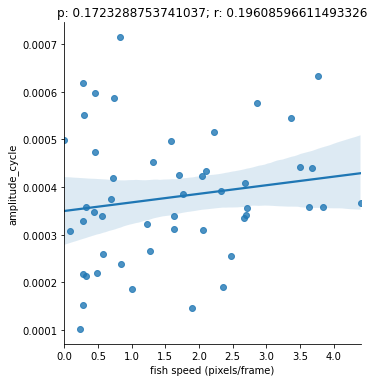

In [ ]:
#to_graphs=to_graphs.loc[to_graphs["speed_cycle"] < 140]

#from scipy.stats import spearmanr
from scipy.stats.mstats import spearmanr


ax = sns.lmplot(data=only1, x="fish_speed", y="amplitude_cycle") #.set(title='p: 0.00000050; r: 0.35')
r, pvalue = spearmanr(only1["fish_speed"], only1["amplitude_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='amplitude_cycle').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(f"Decimal Representation p: {pvalue:.30f}")
print(f"Decimal Representation r: {r:.30f}")

<AxesSubplot:>

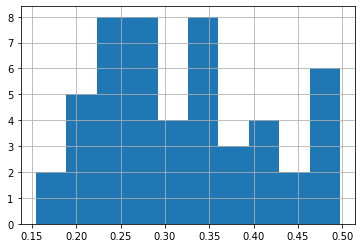

In [ ]:

only1["tail_uniformity"].hist()



2.350553267252946e-10
Decimal Representation of p: 0.000000000235055326725294621675
Decimal Representation of r: -0.399823734550684373179052499836


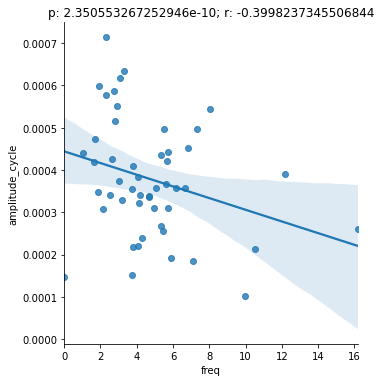

In [ ]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="freq", y="amplitude_cycle")
r, pvalue = spearmanr(to_graphs["freq"], to_graphs["amplitude_cycle"])
ax.set(xlabel='freq', ylabel='amplitude_cycle').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

0.1723288753741037
Decimal Representation of p: 0.172328875374103712703188762134
Decimal Representation of r: 0.196085966114933257786745457452


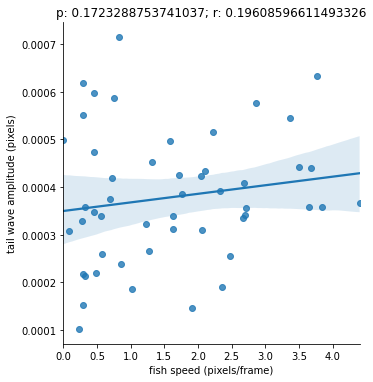

In [ ]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="fish_speed", y="amplitude_cycle")
r, pvalue = spearmanr(only1["fish_speed"], only1["amplitude_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave amplitude (pixels)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [ ]:
to_graphs.columns

Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'len_of_line', 'ant', 'pen', 'ult', 'cycle',
       'diffs', 'speed_frame', 'speed_cycle', 'distance_cycle', 'tail_diff',
       'tail_diff_max', 'tail_diff_min', 'group_length_of_fish',
       'amplitude_cycle', 'freq', 'wave_length', 'freq*ampli', 'c_counts',
       'tail_uniformity', 'fish_speed', 'fish_uid', 'amp_veloc_esp',
       'freq_veloc_esp'],
      dtype='object')

0.037310747247971045
Decimal Representation of p: 0.037310747247971044748826585646
Decimal Representation of r: 0.295353585992368272705732579198


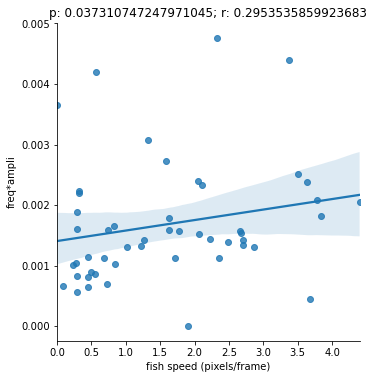

In [ ]:
#df=df.loc[df["amp/freq"] < 1]


from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq*ampli"])

ax = sns.lmplot(data=only1, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='freq*ampli')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

0.34219791041665404
Decimal Representation of p: 0.342197910416654038634476364678
Decimal Representation of r: 0.137159323836455904199738142779


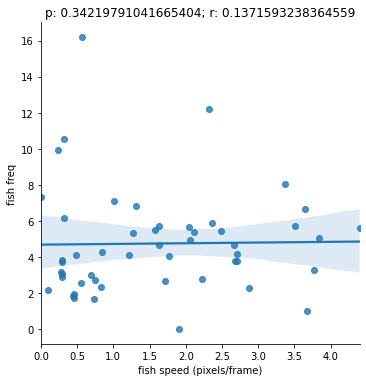

In [ ]:

from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq"])
ax = sns.lmplot(data=only1, x="fish_speed", y="freq").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='fish freq')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

0.037310747247971045
Decimal Representation of p: 0.037310747247971044748826585646
Decimal Representation of r: 0.295353585992368272705732579198


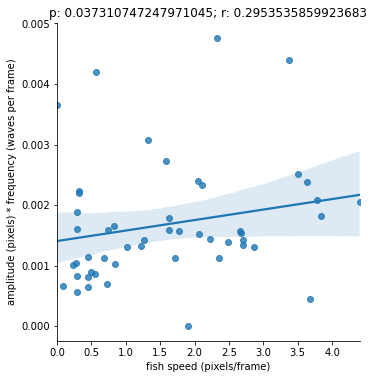

In [ ]:
from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq*ampli"])

ax = sns.lmplot(data=only1, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='amplitude (pixels) * frequency (waves per frame)')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

[Text(0.5, 0, ''), Text(0, 0.5, '')]

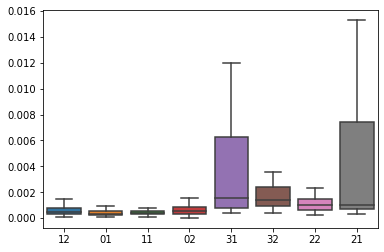

In [ ]:

ax = sns.boxplot(data=df, x="fish_uid", y="amplitude_cycle", showfliers = False)
ax.set(xlabel='', ylabel='')


<AxesSubplot:>

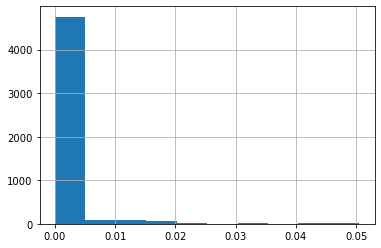

In [ ]:
df["amplitude_cycle"].hist()

In [ ]:
df.loc[(df["fish_uid"] == "31") & (df["amplitude_cycle"] > 0.02)]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,len_of_line,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,group_length_of_fish,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,tail_uniformity,fish_speed,fish_uid,amp_veloc_esp,freq_veloc_esp
frame_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4332,12.369317,"(107, 11)","(79, 14)","(119, 8)",3,252.5,1,"(0, 0, 416, 409)",44578,"((1.0, 1.075), (4.276466106531159, 1.033333333...",124,13.105864,0.950000,0.866667,0.825000,1.0,NaN,NaN,0.23371,21.213203,4.166667e-02,0.279221,2.220446e-16,13.334621,0.02094,5.580602,0.041879,0.116855,6,18.849116,3.535534,31,0.005923,1.578433
4333,14.142136,"(110, 10)","(81, 15)","(124, 8)",3,249.0,1,"(0, 0, 416, 409)",44578,"((1.0, 1.0896103896103895), (4.268149211607724...",124,13.072597,0.992208,0.914286,0.635065,1.0,-0.189935,0.189935,0.23371,21.213203,2.792208e-01,0.279221,2.220446e-16,13.334621,0.02094,5.580602,0.041879,0.116855,6,18.849116,3.535534,31,0.005923,1.578433
4334,12.165525,"(117, 10)","(88, 11)","(129, 8)",3,247.5,1,"(0, 0, 416, 409)",44578,"((1.0, 1.019420287088554), (4.047965644234884,...",124,13.129698,1.049156,1.166574,1.206926,1.0,0.571861,0.571861,0.23371,21.213203,4.035196e-02,0.279221,2.220446e-16,13.334621,0.02094,5.580602,0.041879,0.116855,6,18.849116,3.535534,31,0.005923,1.578433
4335,14.035669,"(120, 9)","(91, 10)","(134, 8)",3,251.5,1,"(0, 0, 416, 409)",44578,"((1.0, 0.909181027654345), (4.289743210065211,...",124,13.158973,1.051744,1.163856,1.306841,1.0,0.099915,0.099915,0.23371,21.213203,1.429845e-01,0.279221,2.220446e-16,13.334621,0.02094,5.580602,0.041879,0.116855,6,18.849116,3.535534,31,0.005923,1.578433
4336,13.152946,"(125, 9)","(96, 11)","(138, 7)",3,255.0,1,"(0, 0, 416, 409)",44578,"((1.0, 1.0028160817034628), (4.284028489917894...",124,13.056016,1.017141,1.087844,1.201675,1.0,-0.105166,0.105166,0.23371,21.213203,1.138304e-01,0.279221,2.220446e-16,13.334621,0.02094,5.580602,0.041879,0.116855,6,18.849116,3.535534,31,0.005923,1.578433
4337,14.142136,"(128, 8)","(97, 12)","(142, 6)",3,258.0,1,"(0, 0, 416, 409)",44578,"((1.0, 1.0000000000000016), (4.279312491346191...",124,13.117250,1.000000,1.000000,1.000000,1.0,-0.201675,0.201675,0.23371,21.213203,2.220446e-16,0.279221,2.220446e-16,13.334621,0.02094,5.580602,0.041879,0.116855,6,18.849116,3.535534,31,0.005923,1.578433


[Text(0.5, 0, ''), Text(0, 0.5, '')]

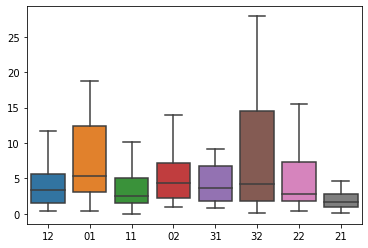

In [ ]:
ax = sns.boxplot(data=df, x="fish_uid", y="freq_veloc_esp",showfliers = False)
ax.set(xlabel='', ylabel='')
